In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils.viz import viz 
from utils.main import *
viz.get_style()

In [2]:
lst = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
n_items = 5

In [3]:
def code_input(st):
    i, j = st[0], st[-1]
    return (lst.index(i), lst.index(j))

In [4]:
def show_filters(filters):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    for i in range(params[-1]):
        ax.plot(np.linspace(-8, 8, 10), [10-i]*10, 
                ls='--', lw=.5, color='grey')
        for j in range(n_items):
                ax.text(filters[i, j], 10-i-.25, lst[j])
        ax.set_axis_off()

weight: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


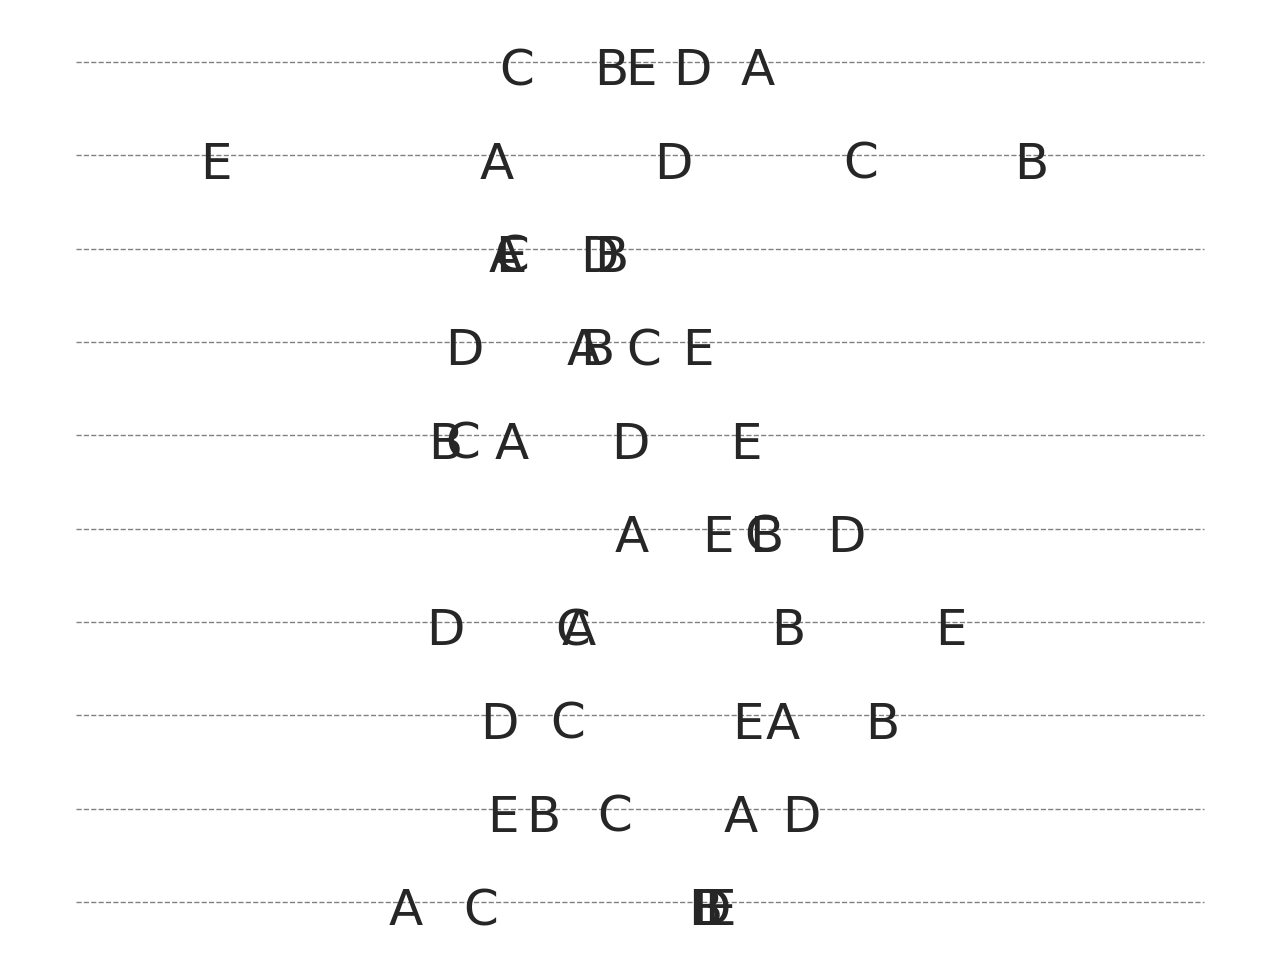

In [5]:
params = [2, 2, 1, 10, 10]
model  = particleFilter(params=params, n_items=n_items)
show_filters(model.filters)    
print(f'weight: {model.weights}')    

weight: [6.12065475e-03 2.89253906e-05 4.18483446e-03 1.99193898e-01
 1.96979167e-01 2.64144269e-03 1.99788003e-01 1.99308163e-01
 2.70393128e-04 1.91484519e-01]


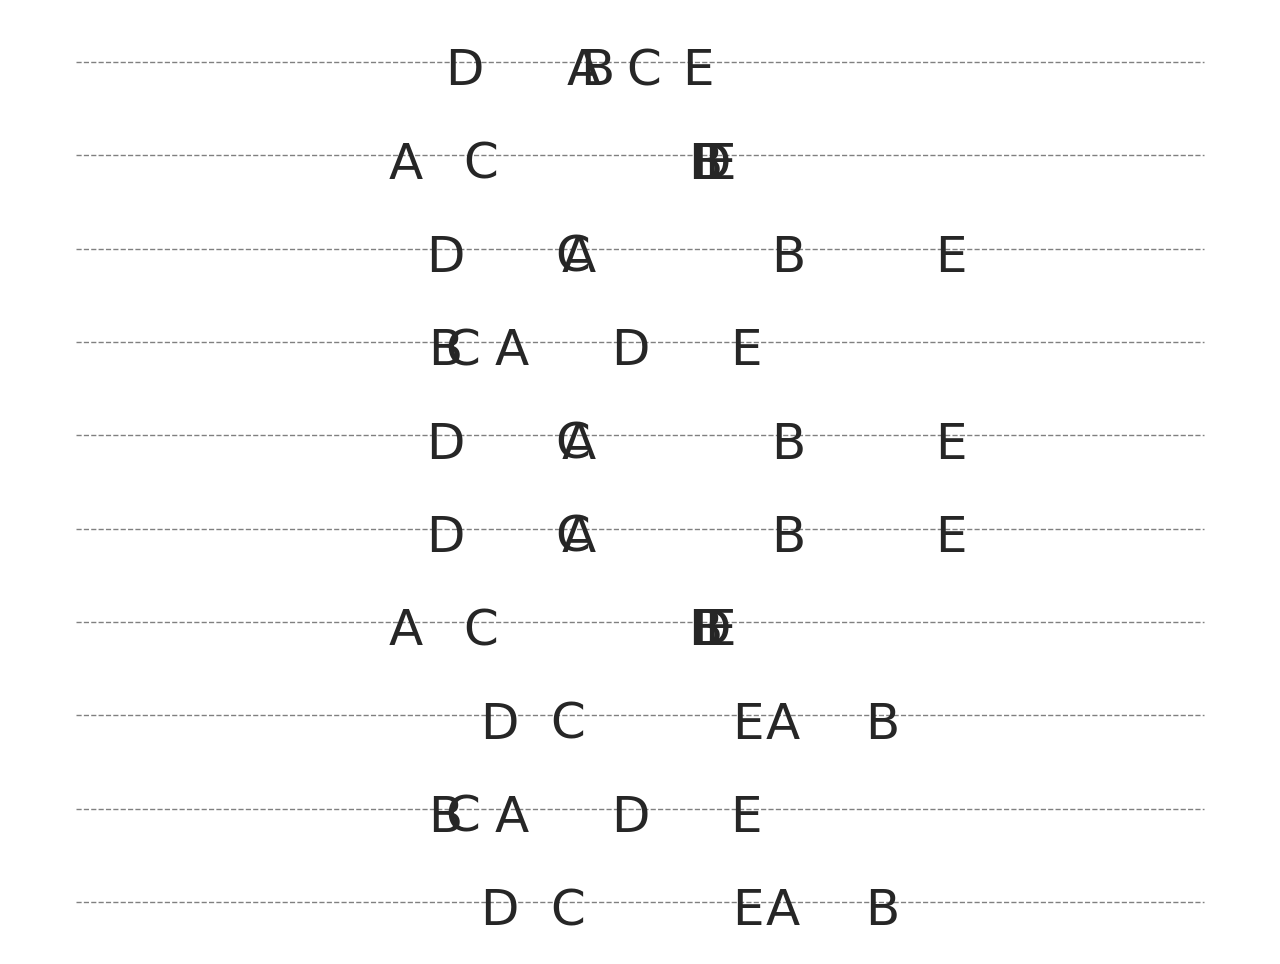

In [6]:
model.reweight(code_input('D < E'))
print(f'weight: {model.weights}')  
model.resampling()
show_filters(model.filters) 

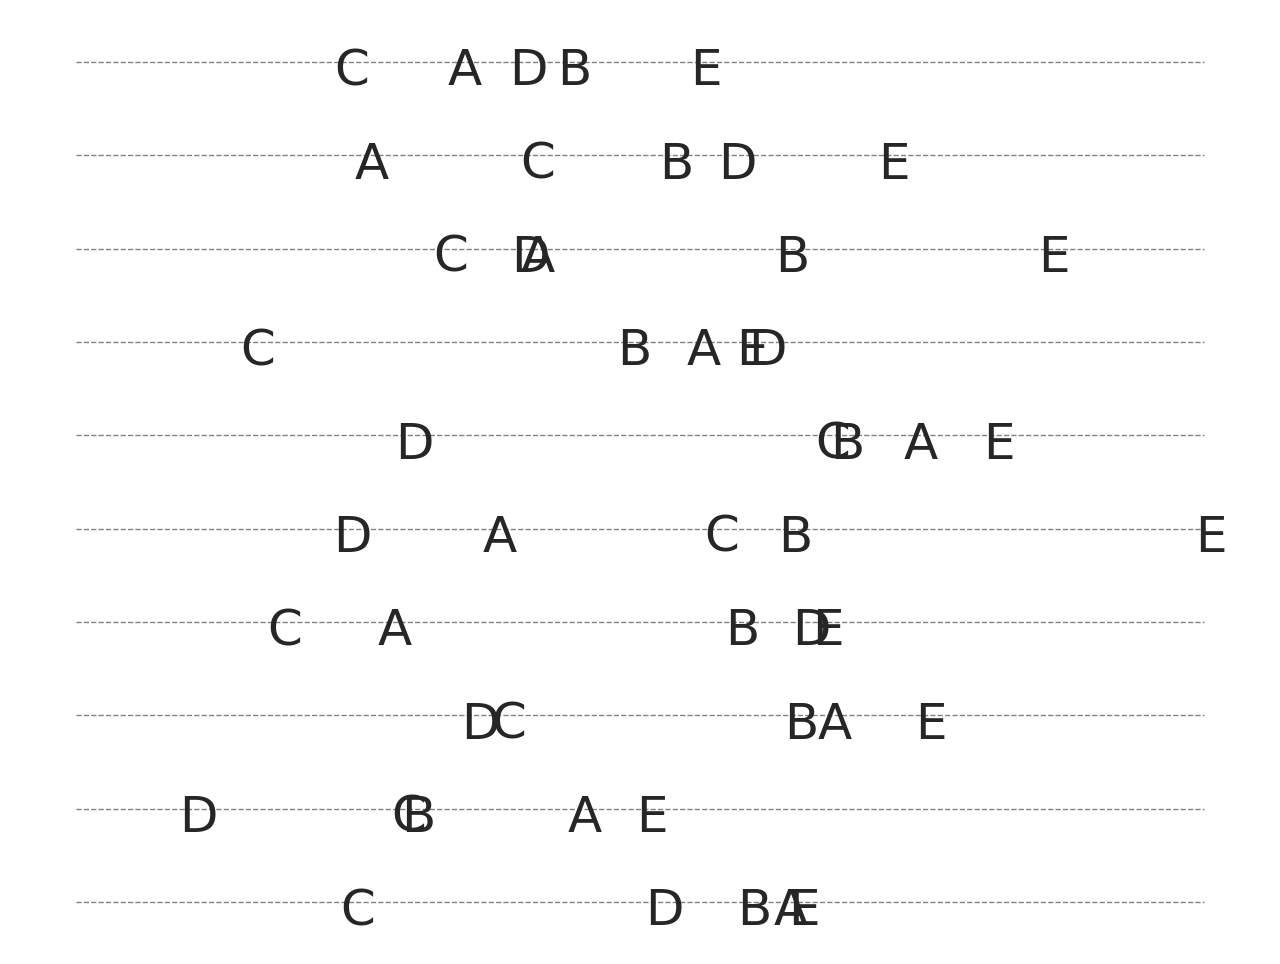

In [7]:
model.propagation()
show_filters(model.filters) 

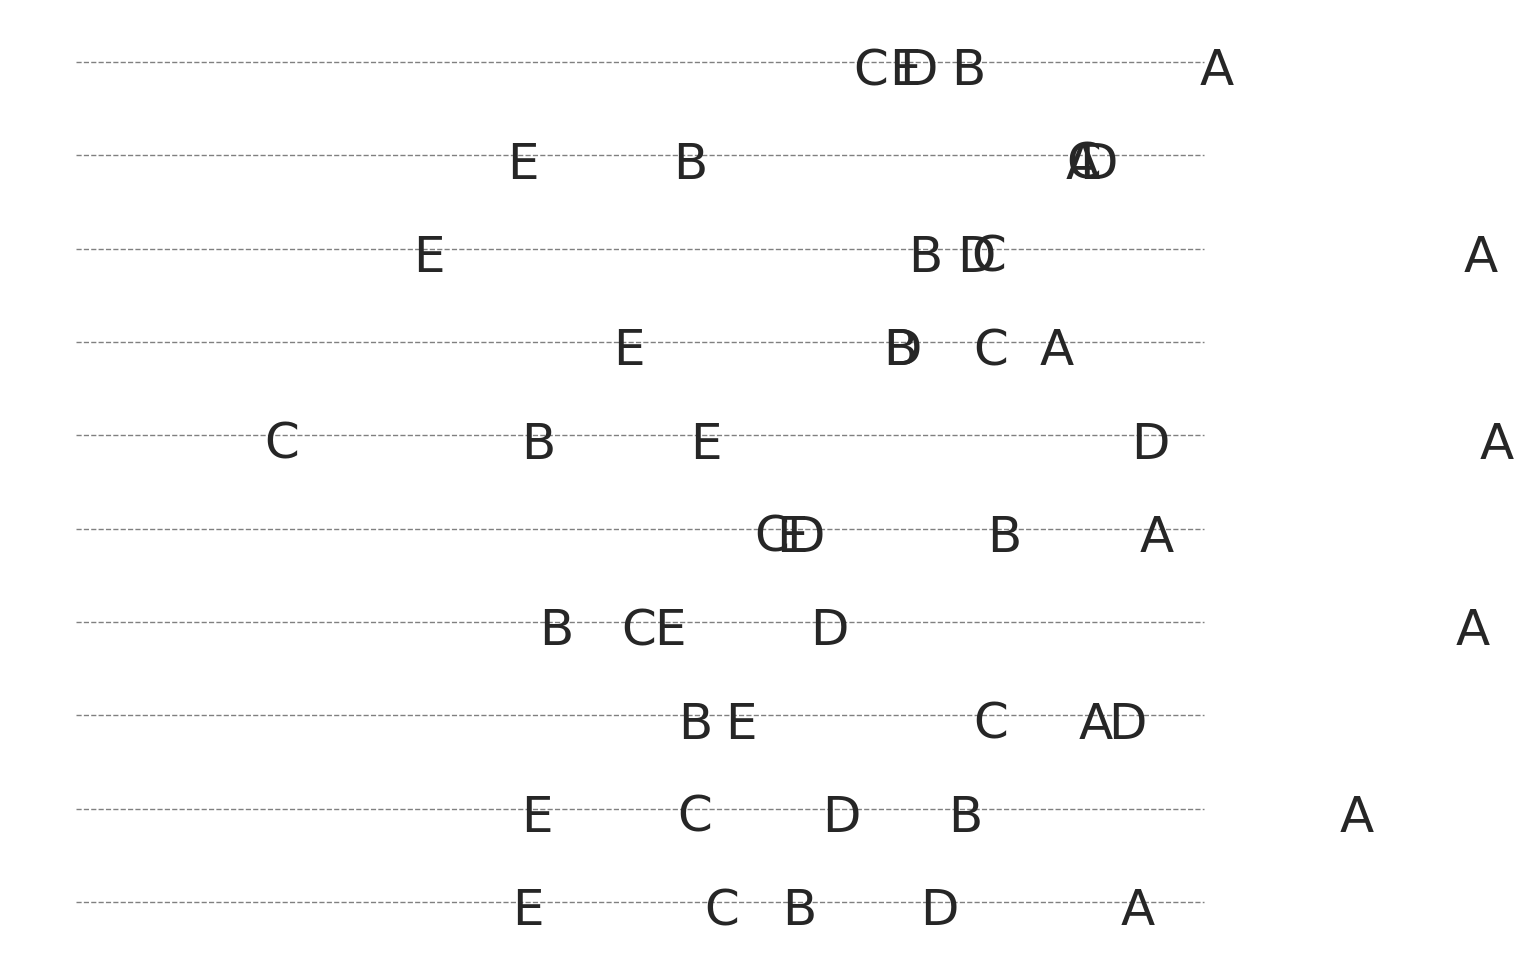

In [8]:
# Chains
tasks = ['A < B', 'B < C', 'C < D', 'D < E']
params = [2, 2, 1, 10, 10]
model  = particleFilter(params=params, n_items=n_items)
for task in tasks:
    model.step(code_input(task))
show_filters(model.filters) 

['D < E', 'B < C', 'C < D', 'A < B']


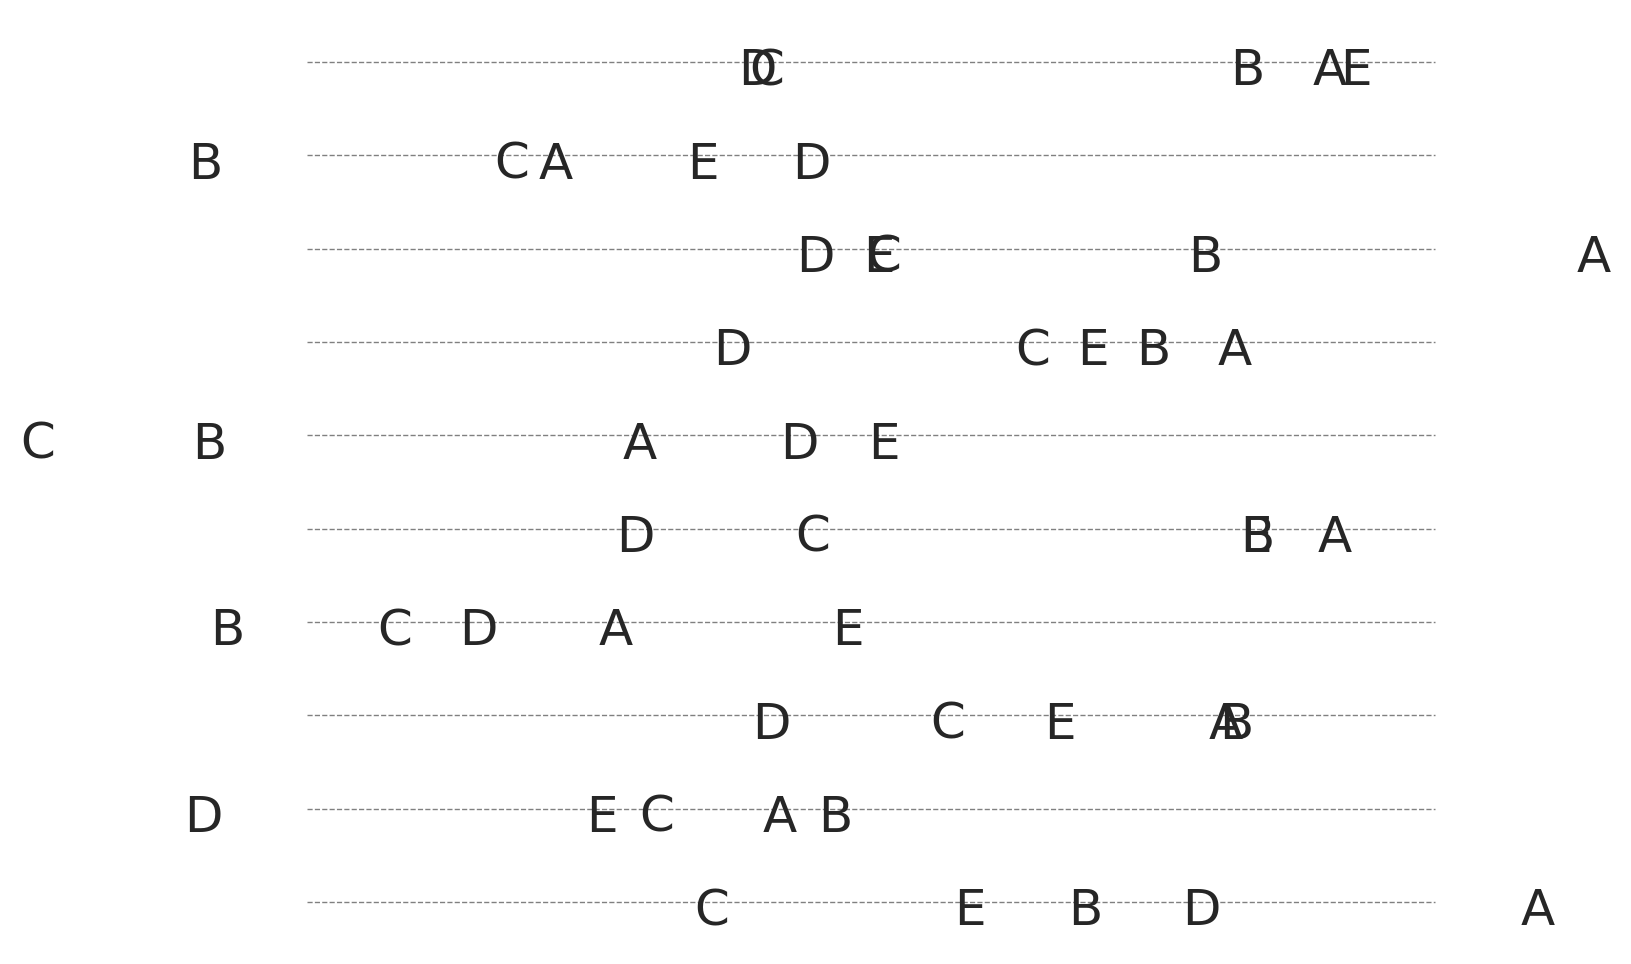

In [9]:
# Jumps
tasks = ['A < B', 'B < C', 'C < D', 'D < E']
np.random.shuffle(tasks)
print(tasks)
params = [2, 2, 1, 10, 10]
model  = particleFilter(params=params, n_items=n_items)
for task in tasks:
    model.step(code_input(task))
show_filters(model.filters) 